Домашнє завдання. Інтегральне обчислення. Чисельне інтегрування

Ти замовив/-ла виконання дослідження ефективності роботи співробітників і отримав/-ла наближену залежність ефективності роботи (кількість тасків за одиницю часу) від часу доби, за умови, що завдання однакові за складністю.

$f(x) = 2 \left( \frac{4}{1.2 \sqrt{2 \pi}} e^{-\frac{1}{2} \left( \frac{x-11}{1.2} \right)^2} + \frac{7}{2.4 \sqrt{2 \pi}} e^{-\frac{1}{2} \left( \frac{x-15}{2.4} \right)^2} \right)$

Позначимо початок і кінець робочого дня як a=9 та b=18 відповідно.
Тобі буде потрібно порахувати середню кількість тасків, виконаних упродовж робочого дня (в робочі години з 9 до 18).

Завдання 1

Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.

Загальна кількість задач з 9 до 18 годин: 20.05


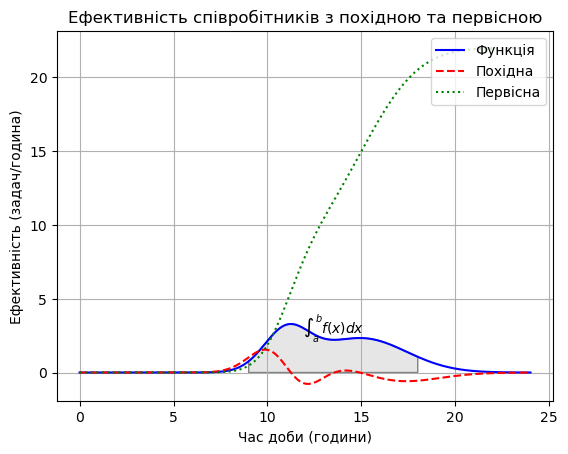

Невизначений інтеграл функції f(x):
4.94974746830583⋅√2⋅erf(0.294627825494395⋅x - 4.41941738241592) + 2.8284271247 ↪

↪ 4619⋅√2⋅erf(0.58925565098879⋅x - 6.48181216087669)
Визначений інтеграл функції f(x) від 9 до 18: 20.0516450141883


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, cumulative_trapezoid
from matplotlib.patches import Polygon
from sympy import symbols, integrate, exp, sqrt, pi, pprint

# Визначаємо символьну змінну для SymPy
x_sym = symbols('x')

# Описуємо функцію f(x) у SymPy
f_sym = 2 * (4 / (1.2 * sqrt(2 * pi)) * exp(-0.5 * ((x_sym - 11) / 1.2) ** 2) +
             7 / (2.4 * sqrt(2 * pi)) * exp(-0.5 * ((x_sym - 15) / 2.4) ** 2))

# Визначаємо функцію f(x) для чисельних розрахунків
def f(x):
    term1 = (4 / (1.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 11) / 1.2) ** 2)
    term2 = (7 / (2.4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 15) / 2.4) ** 2)
    return 2 * (term1 + term2)

# Границі інтегрування
a, b = 9, 18  # Робочі години

# Створюємо масив значень для x
x = np.linspace(0, 24, 500)
y = f(x)

# Чисельне інтегрування для підрахунку задач від 9 до 18 годин
integral, error = quad(f, a, b)
print(f"Загальна кількість задач з {a} до {b} годин: {integral:.2f}")

# Похідна функції
y_derivative = np.gradient(y, x[1] - x[0])

# Первісна функція (невизначений інтеграл)
y_integral = cumulative_trapezoid(y, x, initial=0)

# Візуалізація функції та її похідної і первісної
fig, ax = plt.subplots()

# Графік самої функції
ax.plot(x, y, 'b-', label='Функція')
# Додаємо похідну на графік
ax.plot(x, y_derivative, 'r--', label='Похідна')
# Додаємо первісну на графік
ax.plot(x, y_integral, 'g:', label='Первісна')
# Зафарбовуємо область інтегралу між a і b
ix = np.linspace(a, b, 100)  # Масив значень x для інтегралу
iy = f(ix)  # Відповідні значення y для інтегралу
# Створюємо список вершин для полігону
vertices = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]

# Створюємо полігон для зафарбованої області
poly = Polygon(vertices, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.xlabel('Час доби (години)')
plt.ylabel('Ефективність (задач/година)')
plt.title('Ефективність співробітників з похідною та первісною')
plt.legend(loc='upper right')
plt.grid(True)
ax.text(0.5 * (a + b), 0.8 * max(y), r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=10)
plt.show()

# Невизначений інтеграл функції за допомогою SymPy
f_integral_sym = integrate(f_sym, x_sym)
# Виведення символьного виразу
print(f"Невизначений інтеграл функції f(x):")
pprint(f_integral_sym, use_unicode=True)

# Визначений інтеграл від a=9 до b=18
definite_integral = integrate(f_sym, (x_sym, a, b))
print(f"Визначений інтеграл функції f(x) від {a} до {b}: {definite_integral.evalf()}")

Завдання 2

Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від a до b.

In [19]:
import numpy as np

# Функція чисельного інтегрування методом прямокутників
def rectangle_method(f, a, b, n):
    """
    Чисельне інтегрування методом середніх прямокутників.
    
    f : функція, яку інтегруємо
    a : початок інтервалу інтегрування
    b : кінець інтервалу інтегрування
    n : кількість підінтервалів (кількість прямокутників)
    
    Повертає наближене значення інтегралу.
    """
    # Крок розбиття
    h = (b - a) / n

    # Середні точки кожного підінтервалу
    x_midpoints = np.linspace(a + h/2, b - h/2, n)

    # Обчислюємо значення функції в середніх точках і знаходимо суму площ прямокутників
    integral = h * np.sum(f(x_midpoints))

    return integral

# Функція, яку будемо інтегрувати (використаємо вашу функцію f(x))
def f(x):
    term1 = (4 / (1.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 11) / 1.2) ** 2)
    term2 = (7 / (2.4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 15) / 2.4) ** 2)
    return 2 * (term1 + term2)

# Параметри для чисельного інтегрування
a = 9  # Початок інтегрування
b = 18  # Кінець інтегрування
n = 1000  # Кількість прямокутників (чим більше, тим точніше)

# Обчислюємо інтеграл методом прямокутників
numerical_integral = rectangle_method(f, a, b, n)

# Виведення результату
print(f"Числове значення інтегралу від {a} до {b} методом прямокутників: {numerical_integral:.5f}")

Числове значення інтегралу від 9 до 18 методом прямокутників: 20.05165


Завдання 3

Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від a до b.

In [20]:
import numpy as np

# Функція чисельного інтегрування методом трапецій
def trapezoidal_method(f, a, b, n):
    """
    Чисельне інтегрування методом трапецій.
    
    f : функція, яку інтегруємо
    a : початок інтервалу інтегрування
    b : кінець інтервалу інтегрування
    n : кількість підінтервалів (кількість трапецій)
    
    Повертає наближене значення інтегралу.
    """
    # Крок розбиття
    h = (b - a) / n

    # Точки, у яких будемо обчислювати функцію
    x = np.linspace(a, b, n + 1)

    # Обчислюємо значення функції в кінцевих точках
    y = f(x)

    # Застосовуємо формулу методу трапецій
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

    return integral

# Функція, яку будемо інтегрувати (використаємо вашу функцію f(x))
def f(x):
    term1 = (4 / (1.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 11) / 1.2) ** 2)
    term2 = (7 / (2.4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 15) / 2.4) ** 2)
    return 2 * (term1 + term2)

# Параметри для чисельного інтегрування
a = 9  # Початок інтегрування
b = 18  # Кінець інтегрування
n = 1000  # Кількість трапецій (чим більше, тим точніше)

# Обчислюємо інтеграл методом трапецій
numerical_integral_trapezoidal = trapezoidal_method(f, a, b, n)

# Виведення результату
print(f"Числове значення інтегралу від {a} до {b} методом трапецій: {numerical_integral_trapezoidal:.5f}")

Числове значення інтегралу від 9 до 18 методом трапецій: 20.05163


Завдання 4

Напиши функцію чисельного інтегрування методом Сімпсона та порахуй інтеграл від a до b.

In [21]:
import numpy as np

# Функція чисельного інтегрування методом Сімпсона
def simpsons_method(f, a, b, n):
    """
    Чисельне інтегрування методом Сімпсона.
    
    f : функція, яку інтегруємо
    a : початок інтервалу інтегрування
    b : кінець інтервалу інтегрування
    n : кількість підінтервалів (n має бути парним)
    
    Повертає наближене значення інтегралу.
    """
    if n % 2 == 1:
        raise ValueError("n має бути парним для методу Сімпсона")

    # Крок розбиття
    h = (b - a) / n

    # Точки, у яких будемо обчислювати функцію
    x = np.linspace(a, b, n + 1)

    # Обчислюємо значення функції в точках
    y = f(x)

    # Формула методу Сімпсона
    integral = (h / 3) * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]) + y[-1])

    return integral

# Функція, яку будемо інтегрувати (використаємо вашу функцію f(x))
def f(x):
    term1 = (4 / (1.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 11) / 1.2) ** 2)
    term2 = (7 / (2.4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 15) / 2.4) ** 2)
    return 2 * (term1 + term2)

# Параметри для чисельного інтегрування
a = 9  # Початок інтегрування
b = 18  # Кінець інтегрування
n = 1000  # Кількість підінтервалів (n має бути парним)

# Обчислюємо інтеграл методом Сімпсона
numerical_integral_simpson = simpsons_method(f, a, b, n)

# Виведення результату
print(f"Числове значення інтегралу від {a} до {b} методом Сімпсона: {numerical_integral_simpson:.5f}")

Числове значення інтегралу від 9 до 18 методом Сімпсона: 20.05165


Завдання 5

Порахуй інтеграл від a до b за допомогою функції scipy.integrate.quad.

In [22]:
import numpy as np
from scipy.integrate import quad

# Функція, яку будемо інтегрувати (використаємо вашу функцію f(x))
def f(x):
    term1 = (4 / (1.2 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 11) / 1.2) ** 2)
    term2 = (7 / (2.4 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 15) / 2.4) ** 2)
    return 2 * (term1 + term2)

# Параметри для інтегрування
a = 9  # Початок інтегрування
b = 18  # Кінець інтегрування

# Обчислюємо інтеграл за допомогою scipy.integrate.quad
integral, error = quad(f, a, b)

# Виведення результату
print(f"Числове значення інтегралу від {a} до {b} за допомогою quad: {integral:.5f}")
print(f"Оцінка похибки: {error:.5e}")

Числове значення інтегралу від 9 до 18 за допомогою quad: 20.05165
Оцінка похибки: 1.26723e-11
